This is a brief tutorial on one of my favorite visualization libraries, Plotly.

In this Notebook we will highlight graphics built using the API of plotly which is called Plotly Express which allows to create figures easy to stylized by using a variety of data type.

Plotly Official site : <a href="https://plotly.com/">Plotly Official</a>

<img src="https://i.postimg.cc/y82XjDRB/logo-plotly.png" alt="Plotly Logo" width="600" height="600">

In this notebook i have chosen 3 data sets :
<ul>
  <li>Data updated on Covid 19 worldwide. Nothing better than manipulating the current trend data =).</li>
  <li>Data generated randomly. To display the ternary graphs I needed 3 features with the same unit so I had to call numpy for that.</li>
  <li>Data on Covid 19 but this time they are devoted to the states of the USA to display a global map of the United States and display the evolution of the epidemic on this map </li>
</ul>

It is not a DEA on the covid 19, it is that I use these data for the different graphs because they are more meaningful at the moment.

The advantage of plotly compared to other libraries like Matplotlib or Seaborn, Plotly offers the possibility of interaction after display, it is possible to see the detail of a specific place with the tooltips, the possibility of applying filters and also to animate the graphs by making them change in relation to a unit of time and many other interactions.

This makes Plotly interesting for statisticians and also the general public and business. This makes Plotly interesting for statisticians and also the general public and business. We also use this interactivity to build Dashboards.

**Please, if you have suggestions to improve the content of my notebooks leave me your opinion in comments, and if you found this tutorial useful or simply you like to see these colorful graphs leave me an UpVote that motivates me.  =)**

# Contents

* [<font size=4>Import Libraries, Read and Adjust Data</font>](#1)
* [<font size=4>1. Scatter</font>](#2)
* [<font size=4>2. Line</font>](#3)
* [<font size=4>3. Area</font>](#4)
* [<font size=4>4. Bar</font>](#5)
* [<font size=4>5. Density Contours</font>](#6)
* [<font size=4>6. Density Heatmap</font>](#7)
* [<font size=4>7. Pie</font>](#8)
* [<font size=4>8. Strip</font>](#9)
* [<font size=4>9. Box</font>](#10)
* [<font size=4>10. Violin</font>](#11)
* [<font size=4>11. Parallel Coordinates</font>](#12)
* [<font size=4>12. Parallel Categories</font>](#13)
* [<font size=4>13. Scatter Ternary</font>](#14)
* [<font size=4>14. Line Ternary</font>](#15)
* [<font size=4>15.  Scatter 3D</font>](#16)
* [<font size=4>16. Scatter Polar</font>](#17)
* [<font size=4>17. Line Polar</font>](#18)
* [<font size=4>18. Bar Polar</font>](#19)
* [<font size=4>19. Maps</font>](#20)
* [<font size=4>20. Choropleth</font>](#21)
* [<font size=4>Conclusion</font>](#22)

# Import Libraries, Read and Adjust Data <a id="1"></a>

In [ ]:
import numpy as np 
import pandas as pd 
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('../input/covid19-hist-data/COVID-19-geographic-disbtribution-worldwide-2020-06-07.csv', delimiter = ';', engine='python')
df['Date'] = pd.to_datetime(df[['day','month', 'year']])
df = df[df.continentExp != 'Oceania']
df.dropna(inplace = True)
display(df.head())
display(df.info())

# 1. Scatter <a id="2"></a>

All graphs that are displayed I used the 'plotly.express' API

I also call 'update_layout' to update the title and the names of the axes.

Also in all the graphics the first attribute is the data in Pandas Dataframe format and then the X and Y axes and sometimes Z which are the name of the column which represents these axes.


In [ ]:
Data_to_plot = df[(df['Date'] == df['Date'].max()) & (df['deaths'] > 0) & (df['cases']> 0)]

fig = px.scatter(Data_to_plot, x="cases", y="deaths",)
fig.update_layout(title="Scatter 2",xaxis_title="Cases (log)",yaxis_title="Deaths (log)")
fig2 = px.scatter(Data_to_plot, x="cases", y="deaths",log_x=True, log_y=True)
fig2.update_layout(title="Scatter 1",xaxis_title="Cases (log)",yaxis_title="Deaths (log)")

fig.show()
fig2.show()

The two graphs is a 2D representation on the cases and the dead of Covid 19. However, the first graph is not very legible because there are aberrant cases which zoom out the graph so the other points are found piled up and not very legible.

It is possible to remedy this by applying the logarithm function on the two axes to reduce the aberrant value while keeping the real values displayed on the axes and the tooltip.

this is really practical because in real time we treat the aberrant values by applying the logarithm to the basic data which arranges the display but distorts the values.

applying the Log is done by combining the attributes 'log x' and 'log_y' to True.

In [ ]:
fig = px.scatter(Data_to_plot, x="cases", y="deaths", color="continentExp",log_x=True, log_y=True, labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population'},marginal_y="rug", marginal_x="rug")
fig.update_layout(title="Scatter 3",xaxis_title="Cases (log)",yaxis_title="Deaths (log)")
fig.show()

fig2 = px.scatter(Data_to_plot, x="cases", y="deaths", color="continentExp",log_x=True, log_y=True,size='popData2018', labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population'},marginal_y="violin", marginal_x="box", trendline="ols")
fig2.update_layout(title="Scatter 4",xaxis_title="Cases (log)",yaxis_title="Deaths (log)")
fig2.show()

<img src="https://i.postimg.cc/8zQ2VmqV/t625c.jpg" align="right" width="300" height="400">

We can make scatter plots more interesting by changing the color of the points so that it represents a specific category and by highlighting the dencity of the points according to the perspective of the axes by displaying rug on the two marginal. as shown in the first graph.

It is also possible to modify the size of the points according to a specific measure, display the perspectives of the scatter with a boxplot or a violin plot and the most important thing is that we can display the linear regression of the points with their formula like this. is shown in the second graph. Isn't that great?

The lines appear curved because of the Log function but if we did not apply the lines will be straight.

We can put on the marginal what we want by modifying the attributes 'marginal_x' and 'marginal_y', Change the point size with 'size' and add the regression line with 'trendline'.

<BR CLEAR=”left” />

In [ ]:
Data_to_plot = df[(df['cases'] > 0) & (df['deaths']> 0) & (df['year'] >= 2020)]
fig = px.scatter(Data_to_plot, x="cases", y="deaths", facet_row="year", facet_col="month", color="continentExp", trendline="ols",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population'})
fig.update_layout(title="Scatter 5",xaxis_title="Cases",yaxis_title="Deaths")
fig.show()

Data_to_plot = df[(df['cases'] > 0) & (df['deaths']> 0) & (df['year'] >= 2020)]
Data_to_plot['Date_str']  = Data_to_plot['Date'].astype(str)
fig2 = px.scatter(Data_to_plot, x="cases", y="deaths", animation_frame="Date_str", size="cases", color="continentExp", hover_name="continentExp", facet_col="continentExp", facet_row="year",log_x=True, log_y=True
                ,labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population', 'Date_str' : 'Date'})
fig2.show()

It is also possible to create subplots depending on a chosen category as shown in the first graph.

Also animate all this by changing the arrangement of the points relative to the date click Play in the second graph to see. Isn't that extraordinary?

there is a rumor which says that the first season of the Simpsons was made in this way .... I'm joking x) but it is possible!

The attributes which make it possible to realize the sub graphs are 'facet_col' and 'facet_row' and to realize an animation worthy of spielberg it is necessary to choose a value of time and to attribute it to 'animation_frame'

# 2. Line <a id="3"></a>

In [ ]:
Data_to_plot = df.groupby('Date')[['deaths', 'cases']].sum().cumsum().reset_index()
Data_to_plot = pd.melt(Data_to_plot, id_vars=['Date'], value_vars=['cases', 'deaths'])
fig = px.line(Data_to_plot, x="Date", y="value",color= 'variable', labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population', 'value' : 'Value', 'variable' : 'Variable'},line_shape="spline", render_mode="svg")
fig.update_layout(title="Line 1",xaxis_title="Date",yaxis_title="Cases")
fig.show()

A simple banal line plot with 2 progression curves.

In [ ]:
Data_to_plot = df.groupby(['Date', 'continentExp'])[['deaths', 'cases']].sum().reset_index()
fig = px.line(Data_to_plot, x="Date", y="cases",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population'},line_shape="spline", render_mode="svg", hover_name="continentExp", color = "continentExp")
fig.update_layout(title="Line 2 (Cases)",xaxis_title="Date",yaxis_title="Cases")
fig.show()

fig2 = px.line(Data_to_plot, x="Date", y="deaths",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population'},      line_shape="spline", render_mode="svg", hover_name="continentExp", color = "continentExp")
fig2.update_layout(title="Line 3 (Deaths)",xaxis_title="Date",yaxis_title="Deaths")
fig2.show()

In these graphs I displayed several curves in the same graph where each curve corresponds to information on a specific continent. What is interesting here is that it is possible to display titles in bold in the Tooltips, in the example I chose the name of the continent.

It is also possible to make the curves more beautiful by rounding the angles with the parameter 'line_shape'.

# 3. Area <a id="4"></a>

In [ ]:
Data_to_plot = df.groupby(['Date', 'continentExp'])[['deaths', 'cases']].sum().reset_index()
Data_to_plot[['cumsum_deaths', 'cumsum_cases']] = Data_to_plot.groupby('continentExp').cumsum()
fig = px.area(Data_to_plot, x="Date", y="cumsum_deaths",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population', 'cumsum_cases' : 'Cumulative Cases', 'cumsum_deaths' : 'Cumulative Deaths'},line_shape="spline", hover_name="continentExp", color = "continentExp")
fig.update_layout(title="Area",xaxis_title="Date",yaxis_title="Cumulative Deaths")
fig.show()

It is also possible to create area plots in the same way as line plots, the only thing that changes is the name of the function. 'px.area'

# 4. Bar <a id="5"></a>

In [ ]:
Data_to_plot = df.groupby(['Date'])[['deaths', 'cases']].sum().reset_index()
fig = px.bar(Data_to_plot, x="Date", y="cases",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population', 'count':'Count'},)
fig.update_layout(title="Bar 1",xaxis_title="Date",yaxis_title="Cases")
fig.show()

It's no wonder that you can display a bar graph with Plotly, it's basic, I want to say =).

In [ ]:
Data_to_plot = df.groupby(['Date'])[['deaths', 'cases']].sum().reset_index()
Data_to_plot = pd.melt(Data_to_plot, id_vars=['Date'], value_vars=['cases', 'deaths'])
Data_to_plot
fig = px.bar(Data_to_plot, x="Date", y="value", color="variable",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population', 'variable':'Variables'},)
fig.update_layout(title="Bar 2",xaxis_title="Date",yaxis_title="Values")
fig.show()
fig2 = px.bar(Data_to_plot, x="Date", y="value", color="variable", barmode="group",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population', 'variable':'Variables'},)
fig2.update_layout(title="Bar 3",xaxis_title="Date",yaxis_title="Values")
fig2.show()

It is possible to display two categories with a bar graph in two ways, the first one is stacked bars or grouped bars. to manipulate it you have to change the value of the attribute 'barmode'.

In [ ]:
Data_to_plot = df[df['Date'] == df['Date'].max()].groupby(['countriesAndTerritories'])[['deaths', 'cases']].sum().reset_index().sort_values(by = 'cases', ascending = True).tail(20)
Data_to_plot = pd.melt(Data_to_plot, id_vars=['countriesAndTerritories'], value_vars=['cases', 'deaths'])
fig = px.bar(Data_to_plot,x='value', y="countriesAndTerritories", color='variable',  text='value', orientation='h', width=700, labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'countriesAndTerritories' : 'Countries', 'variable':'Variables'},color_discrete_sequence = px.colors.qualitative.Dark2)
fig.update_layout(title="Bar 4",xaxis_title="Values",yaxis_title="Countries")
fig.show()

It is also possible to display the bar chart vertically by changing the 'orientation' attribute and also display the values with the 'text' attribute.

# 5. Density Contours <a id="6"></a>

In [ ]:
Data_to_plot = df.copy()
Data_to_plot['deaths_log']  = np.log10(Data_to_plot['deaths'])
Data_to_plot['cases_log']  = np.log10(Data_to_plot['cases'])
Data_to_plot.head()
fig = px.density_contour(Data_to_plot, x="deaths_log", y="cases_log",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population', 'cases_log' : 'Cases Log10', 'deaths_log' : 'Deaths Log10', 'count':'Count'},)
fig.update_layout(title="Density Contour 1",xaxis_title="Cases (log10)",yaxis_title="Deaths (log10)")
fig.show()
fig2 = px.density_contour(Data_to_plot, x="deaths_log", y="cases_log",color="continentExp", marginal_x="rug", marginal_y="histogram",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population', 'cases_log' : 'Cases Log10', 'deaths_log' : 'Deaths Log10', 'count':'Count'},)
fig2.update_layout(title="Density Contour 2",xaxis_title="Cases (log10)",yaxis_title="Deaths (log10)")
fig2.show()

<img src="https://i.postimg.cc/TwYsbYT4/density-countour.png" align="right" width="500" height="400">
Density contour is a graph which count the densest places with small circles and count for the least dense places with larger circles as shown in the capture on the right.

Guess ... we can do this with plotly, we can even display countour plot for each category at the same time and add graphs to the marginals, it's so cool.

The attributes that allow this are the same as for the scatter.
<BR CLEAR=”left” />



# 6. Density Heatmap <a id="7"></a>

In [ ]:
fig = px.density_heatmap(Data_to_plot, x="deaths_log", y="cases_log",marginal_x="rug", marginal_y="histogram",labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'popData2018' : 'Population', 'cases_log' : 'Cases Log10', 'deaths_log' : 'Deaths Log10', 'count':'Count'},)
fig.update_layout(title="Density Heatmap",xaxis_title="Cases (log10)",yaxis_title="Deaths (log10)")
fig.show()

We can also display the densest places with a hitmap as for a heat sensor.

#  7. Pie <a id="8"></a>

In [ ]:
Data_to_plot = df[df['Date'] == df['Date'].max()].groupby(['continentExp'])[['deaths', 'cases']].sum().reset_index()
fig = px.pie(Data_to_plot, values='cases', names='continentExp',labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'countriesAndTerritories' : 'Countries', 'variable':'Variables'},)
fig.update_layout(title="Pie 1")
fig.show()
Data_to_plot = df[df['Date'] == df['Date'].max()].groupby(['countriesAndTerritories'])[['deaths', 'cases']].sum().reset_index()
fig2 = px.pie(Data_to_plot, values='cases', names='countriesAndTerritories', labels={'continentExp' : 'Continent', 'cases': 'Cases', 'deaths': 'Deaths', 'countriesAndTerritories' : 'Countries', 'variable':'Variables'},)
fig2.update_layout(title="Pie 2",)
fig2.show()

Obviously Plotly also has the pedestal base and it manages it very well, it manages the space well to display the values in (percentage or not) even in small corners. it brings out the colors and there are lots of aesthetic changes that i do not have enough room to locate everything if not it will not be a notebook but an old scroll.

# 8. Strip <a id="9"></a>

In [ ]:
Data_to_plot = df[df.month.isin(['1','2','3','4','5'])].groupby(['month', 'countriesAndTerritories'])[['deaths', 'cases']].sum().reset_index()
Data_to_plot['deaths_log']  = np.log10(Data_to_plot['deaths']+1)
Data_to_plot['cases_log']  = np.log10(Data_to_plot['cases']+1)
fig = px.strip(Data_to_plot, x="month", y="cases_log", labels={'continentExp' : 'Continent', 'cases_log': 'Cases Log10', 'deaths_log': 'Deaths Log10', 'month' : 'Month', 'variable':'Variables'},)
fig.update_layout(title="Strip")
fig.show()

The stip graphs are graphs that show the arrangement of a categorical variable with a continuous variable. and it appears as dots that form columns.

This shows the distribution of continuous values for each category.

# 9. Box <a id="10"></a>

In [ ]:
Data_to_plot = df[df.month.isin(['1','2','3','4','5'])].groupby(['month', 'countriesAndTerritories'])[['deaths', 'cases']].sum().reset_index()
Data_to_plot = pd.melt(Data_to_plot, id_vars=['month', 'countriesAndTerritories'], value_vars=['cases', 'deaths'])
Data_to_plot['value_log10']  = np.log10(Data_to_plot['value']+1)
fig = px.box(Data_to_plot, x="month", y="value_log10", color="variable", notched=True, labels={'variable' : 'Variables', 'cases_log': 'Cases Log10', 'deaths_log': 'Deaths Log10', 'month' : 'Month', 'value_log10':'Values Log10'},)
fig.update_layout(   title="Box")
fig.show()

The Box plot is like the strip plot but with more information on the allocation of values.

it provides the median, the 4 quarters, the outliers if they exist, the min and the max and most importantly the density of the values where it is located, generally inside the large rectangle.

We can display two categories at the same time as shown here.

# 10. Violin <a id="11"></a>

In [ ]:
fig = px.violin(Data_to_plot, x="month", y="value_log10", color="variable", box=True, points="all", labels={'variable' : 'Variables', 'cases_log': 'Cases Log10', 'deaths_log': 'Deaths Log10', 'month' : 'Month', 'value_log10':'Values Log10'},)
fig.update_layout(title="Violin")
fig.show()

The violin plot are very similar to the box the only difference is instead of mounting the space between the second quartil and the fourth is a violin instead of a box, it is better because it is more explicit, the shape of the violin also changes depending on the density.

We can display the graphs in violin and also the stripes at the same time as displayed here.

 # 11. Parallel Coordinates <a id="12"></a>

In [ ]:
df_to_plot =  df[df.month.isin(['2'])][['cases','deaths','day','month', 'continentExp', 'popData2018']]
dict_ = {'Asia' : 1, 'Europe' : 2, 'Africa' : 3, 'America' : 4}
df_to_plot['continentEmap'] = df_to_plot['continentExp'].map(dict_)
df_to_plot['cases_log10'] =  np.log10(df_to_plot['cases']+1)
df_to_plot['deaths_log10'] =  np.log10(df_to_plot['deaths']+1)
fig = px.parallel_coordinates(df_to_plot[['cases_log10','deaths_log10','continentEmap']], color = 'continentEmap',labels={'cases_log10' : 'Cases Log10', 'deaths_log10': 'Deaths Log10', 'continentEmap': 'Continent Id', 'month' : 'Month', 'value_log10':'Values Log10'},color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.update_layout(title="Parallel Coordinates")
fig.show()

The Parallel Coordinates is one of the strong plot of Plotly, each pillar represents a continuous variable which is a feature of the input DataFrame and each link between these pillars is a row of the DataFrame.

the number of links in this graph corresponds to the number of rows in the DataFrame and we can choose the color criteria according to the varibal we choose, here it is continent Id.

This graph is very useful for understanding the main characteristics of a chosen variable by analyzing the routing of the links through the dimensions. it is exceptional!

# 12. Parallel Categories <a id="13"></a>

In [ ]:
df_to_plot['cut_cases_log10'] = pd.cut(df_to_plot['cases_log10'], 4).astype(str)
df_to_plot['cut_deaths_log10'] = pd.cut(df_to_plot['deaths_log10'], 4).astype(str)
fig = px.parallel_categories(df_to_plot[['cut_cases_log10','cut_deaths_log10','continentEmap']], color = 'continentEmap',labels={'cut_cases_log10' : 'Interval Cases Log10', 'cut_deaths_log10': 'Interval Deaths Log10', 'continentEmap': 'Continent Id', 'month' : 'Month', 'value_log10':'Values Log10'},color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.update_layout(title="Parallel Categories")
fig.show()

The Parallel Categories is almost the same as Parallel Coordinates but this time if it is discrete variables which are represented by the pillars and not continuous variables.

The dimensions are linked by ribbons, where the height of the ribbon corresponds to the relative frequency of occurrence of the combination of categories in the data set. WOW!

# 13. Scatter Ternary <a id="14"></a>

Here I generate random values between 0 and 1 for the following graphs.

In [ ]:
df2 =pd.DataFrame(np.random.rand(40,4))
df2['label'] = np.round((3*np.random.rand(40,1) - 3)*-1)
df2[df2['label'] == 0] = 1
df2['label'] = df2['label'].astype(int).map({1:'Label_1', 2:'Label_2', 3:'Label_3'})
df2.columns = ['Value_1','Value_2','Value_3','Value_4', 'Labels']
fig = px.scatter_ternary(df2, a="Value_1", b="Value_2", c="Value_3", color="Labels", size="Value_4", hover_name="Labels",size_max=15, color_discrete_map = {"Label_1": "blue", "Label_2": "green", "Label_3":"red"},labels={'Value_1' : 'Value 1', 'Value_2': 'Value 2', 'Value_3': 'Value 3', 'Value_4' : 'Value 4'})
fig.update_layout(title="Scatter Ternary")
fig.show()

There is the sensational entry of the trinity force, and yes it is a graph with 3 dimensions represented in 2 dimensions, each axis is a variable and inside is a scatter which represents these point in these 3 dimensions.

It is effective to represent 3 dimensions in a flat space.

We can play with the size of the points and the colors as for the previous scatter plots.

# 14. Line Ternary <a id="15"></a>

In [ ]:
fig = px.line_ternary(df2, a="Value_1", b="Value_2", c="Value_3", color="Labels", hover_name="Labels",line_dash="Labels",color_discrete_map = {"Label_1": "blue", "Label_2": "green", "Label_3":"red"},labels={'Value_1' : 'Value 1', 'Value_2': 'Value 2', 'Value_3': 'Value 3', 'Value_4' : 'Value 4'})
fig.update_layout(title="Line Ternary")
fig.show()

It is obviously possible to change the points by lines and change the continuity of the lines with the variable 'line_dash'.

# 15.  Scatter 3D <a id="16"></a>

In [ ]:
fig = px.scatter_3d(df2, x="Value_1", y="Value_2", z="Value_3", color="Labels", size="Value_4", hover_name="Labels",symbol="Labels", color_discrete_map = {"Label_1": "blue", "Label_2": "green", "Label_3":"red"},labels={'Value_1' : 'Value 1', 'Value_2': 'Value 2', 'Value_3': 'Value 3', 'Value_4' : 'Value 4'})
fig.update_layout(title="Scatter 3D")
fig.show()

And also we just pointed the 3rd axis in depth to display an interactive 3D space which shows the arrangement of the points in 3D.

This graph can be manipulated by remaining on the left click and moving the mouse, the perspective of the graph changes and follows the movement.

# 16. Scatter Polar <a id="17"></a>

In [ ]:
df2 = pd.DataFrame(np.round((2.5*np.random.rand(128,1) - 2.5)*-1, 1))
df2['label'] = np.round((5*np.random.rand(128,1) - 5)*-1)
df2['direction'] = np.round((12*np.random.rand(128,1) - 12)*-1)
df2[df2['label'] == 0] = 1
df2[df2['direction'] == 0] = 1
df2['label'] = df2['label'].astype(int).map({1:'Label_1', 2:'Label_2', 3:'Label_3', 4:'Label_4' , 5:'Label_5'})
df2['direction'] = df2['direction'].astype(int).map({1 : 'D1', 2 : 'D2', 3 : 'D3', 4: 'D4', 5 : 'D5', 6 : 'D6', 7 : 'D7', 8 : 'D8', 9 : 'D9', 10 : 'D10', 11 : 'D11', 12 : 'D12'})
df2.columns = ['Values','Label','Direction']
fig = px.scatter_polar(df2, r="Values", theta="Direction", color="Label", symbol="Label",color_discrete_sequence=px.colors.sequential.Rainbow)
fig.update_layout(title="Scatter Polar")
fig.show()

This time instead of displaying 3 dimensions we can display several in a polar, here we have 12 axes, and each point inside corresponds to its value relative to this axis, it is possible to change the shape of the points with the attribute 'symbol'.

# 17. Line Polar <a id="18"></a>

In [ ]:
fig = px.line_polar(df2,r="Values", theta="Direction", color="Label", line_close="Label",line_dash="Label",color_discrete_sequence=px.colors.sequential.Rainbow)
fig.update_layout(title="Line Polar")
fig.show()

As for the Line Ternary we can interchange the points by lines.

# 18. Bar Polar <a id="19"></a>

In [ ]:
fig = px.bar_polar(df2,r="Values", theta="Direction", color="Label", template="plotly_dark",color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.update_layout(title="Bar Polar")
fig.show()

This graph is too beautiful, it represents the value by cones on each axis, each conn is devised in several pieces or the size is proportional to the value of the observation in the axis in question.

with a black background and young, orange and red shades it is too sexy

it is exceptional I am in love.

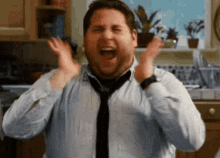

# 19. Maps <a id="20"></a>

The data of the first map is data on the covid 19 in the dufferantes states in the USA.

In [ ]:
df3 = pd.read_csv('../input/covid19-in-usa/us_counties_covid19_daily.csv')
df3['Date'] = pd.to_datetime(df3['date'])
df3 = df3[df3['Date'] == df3['Date'].max()]
df3 = df3.groupby('state').sum().reset_index()

import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://www.latlong.net/category/states-236-14.html'

r = requests.get(url)
html = r.text

soup = BeautifulSoup(html)
table = soup.find('table')
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

result = pd.DataFrame(data, columns=['Place_Name', 'Latitude', 'Longitude'])

result['Place_Name'] = result['Place_Name'].str.replace(', the USA', '')
result['Place_Name'] = result['Place_Name'].str.replace(', the US', '')
result['Place_Name'] = result['Place_Name'].str.replace(', USA', '')
result['Place_Name'] = result['Place_Name'].str.replace(' State', '')
result['Latitude'] = result['Latitude'].astype(float)
result['Longitude'] = result['Longitude'].astype(float)

df3 = df3.merge(result, left_on='state', right_on='Place_Name')


In [ ]:
px.set_mapbox_access_token('pk.eyJ1IjoibWVoZGlnYXNtaSIsImEiOiJjazkwcXplbGowNDNwM25saDBldzY0NmQwIn0.gYQr41tH3KKMOHnml_REeQ')
fig = px.scatter_mapbox(df3, lat="Latitude", lon="Longitude",  color="cases", size = "cases",  zoom=3, labels={'cases' : 'Cases'},  hover_name="state",color_continuous_scale=px.colors.sequential.Plotly3)
fig.update_layout(title="Map 1")
fig.show()

px.data.gapminder()
df_to_plot = df.groupby(['Date', 'countryterritoryCode', 'countriesAndTerritories', 'month'])['cases','deaths'].sum().reset_index()
df_to_plot.loc[df_to_plot.cases < 0,'cases'] = 0
fig2 = px.scatter_geo(df_to_plot, locations="countryterritoryCode", color="cases", hover_name="countriesAndTerritories", size="cases",labels={'cases' : 'Cases', 'countryterritoryCode' : 'Country', 'month' : 'Month'},projection="natural earth", animation_frame="month", color_continuous_scale=px.colors.sequential.Plotly3)
fig2.update_layout(title="Map 2")
fig2.show()

df_to_plot2 = df_to_plot[df_to_plot.Date == df_to_plot.Date.max()]
fig3 = px.scatter_geo(df_to_plot2, locations="countryterritoryCode", color="deaths",size="deaths", projection="orthographic", labels={'deaths' : 'Deaths', 'countryterritoryCode' : 'Country', 'month' : 'Month'},color_continuous_scale=px.colors.sequential.Plotly3, hover_name="countriesAndTerritories")
fig3.update_layout(title="Map 3")
fig3.show()

We can absolutely display several map forms with Plotly, let's explore them one by one:

- the first map is a map zoomed on the USA, each point is arranged according to the geographic coordinates that I scrapped on a site which provides the geolocation of the states of the USA, we assign the longitude to the attribute 'lon' and the latitude to attribute 'lat', the size and color of each point corresponds to the value entered, here it is the number of cases infected by covid 19. we can choose the zoom with the attribute 'zoom', it's crazy that plotly recognize them so easily. We can also change the theme of the map using the tocken provided by the MpBox site, this site has too good a map with a lot of detail with the names of the streets and the layout of the many shops. Website : <a href="https://www.mapbox.com/">mapbox</a>

- The second map displays the same information as the first but this time it is animated by month. if we click on play we see the evolution of cases infected by covid 19 around the world since December 2019 until June 2020 we can do that to the attribute 'animation_frame'. it's fascinating. the second diffrance is the projection of the map this time it's "natural earth" we can change that by manipulating the attribute 'projection'. Plotly recognized the location of the countries not with their coordinates but with their code, it is universal and it is fortunately provided with the file i uploaded =).

- The third map is the same as the second except that it is not animated (we can of course animate it) it is frozen on a precise date, and also it is spherical as in reality, "flat earthers will not like the one" x).

# 20. Choropleth <a id="21"></a>

In [ ]:
fig = px.choropleth(df_to_plot, locations="countryterritoryCode", color="cases", hover_name="countriesAndTerritories", animation_frame="month", range_color=[0,30000], labels={'cases' : 'Cases', 'countryterritoryCode' : 'Country', 'month' : 'Month'}, color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title="Map 4")
fig.show()

Finally it's the top! , I have merged everything in a choropleth map with one animation per month which is good, instead of displaying simple points there it is all the pay which is nuanced compared to the number of cases in its territory, as in previous maps, plotly to find which country it is thanks to the country code and it automatically filled the entire territory of the country with the color that corresponds to the number of cases in the latter. it's amazing.


# Conclusion <a id="22"></a>

Plotly is a great and versatile library, it allows you to generate basic graphs like lines, bars and pie but also it generates other original graphs like polar, ternary and parallel and also various maps for the good of in our eyes, the advantage of plotly graphs is that they are interactive and can be exploited by Muggles in other words by people who are part of the comain of mortals who do not know the enchanted world of data science.

All this is possible easily and in no more than two lines of code thanks to the API of plotly Express. using the low level everything will become more flexible and the possibilities will be increased tenfold.

Hey!!! Thanks for reaching the end =D. I hope these graphs will help you in your own analyzes, give me your opinion on everything that happened above, Upvote if you want, it motivates me to invest myself again and again in future NoteBouks, see you soon, Bye =)